In [251]:
import os
import json
import pylab as pl
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy.stats import ks_2samp
from getCitiBikeCSV import getCitiBikeCSV

%pylab inline

pl.style.use('fivethirtyeight')

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [252]:
datestring = '201501'
getCitiBikeCSV(datestring)

file in place, you can continue


In [253]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [254]:
df["age"] = 2015 - df["birth year"]


In [255]:
df.age = df["age"][~df.age.isnull()]

In [256]:
bins = np.arange(10, 99, 1)
age_distri = df.age.groupby(pd.cut(df.age, bins)).agg([count_nonzero])
agenorm = age_distri/age_distri.sum()

In [257]:
agenorm.columns=["counts"]

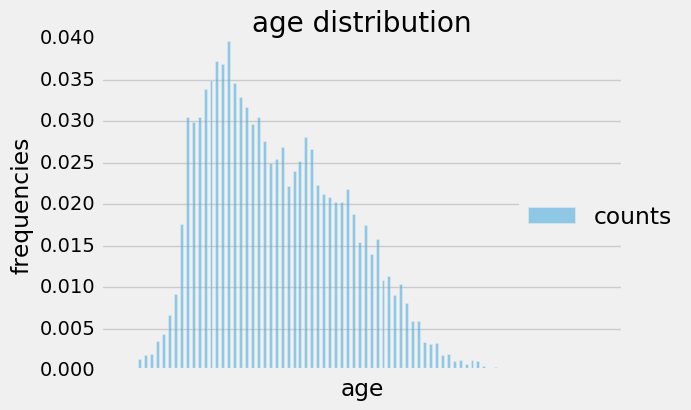

In [258]:
agenorm.plot(kind="bar", alpha=0.5)
pl.xticks([])
pl.title("age distribution")
pl.ylabel("frequencies")
plt.legend(loc =[0.8,0.4])

In [259]:
age_distri = df.age.groupby(pd.cut(df.age, bins)).agg([count_nonzero])

In [260]:
def gauss(x, miu, sig, t):
    a = -(x-miu)**2/(2*sig**2)
    return t*exp(a)

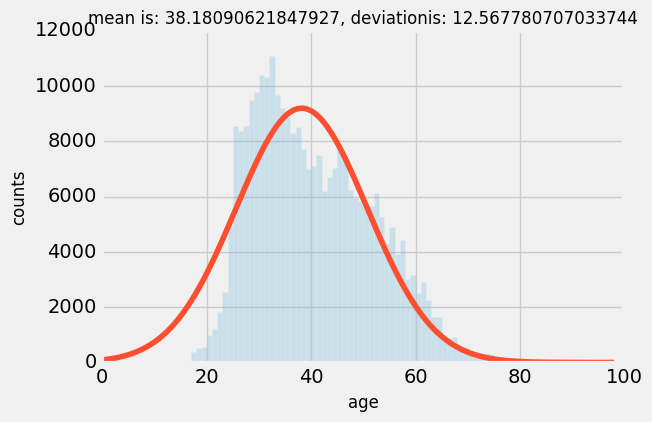

In [261]:
(n,bins,patches) = pl.hist(df.age,bins,alpha = 0.2)
x_lin = np.linspace(bins[0], bins[-1], np.size(n))
x_space = np.linspace(0, bins[-1], 500)
popt, pcov = curve_fit(gauss, x_lin, n, p0 = [20, 12, 5])
y = gauss(x_space, *popt)
pl.xlabel('age', fontsize = 12)
pl.ylabel('counts', fontsize = 12)
pl.plot(x_space, y, label= 'fit')
pl.title("mean is: {}, deviationis: {}".format(popt[0],popt[1]),fontsize=12)

In [264]:
a = ~df.age.isnull()
stats.kstest(a, "norm", args=(popt[0],popt[1]))

KstestResult(statistic=0.99845395038778961, pvalue=0.0)

#### Null Hypothesis:
$H_0$:Age distribution is drawn from gaussian with same mean and standard deviation

p-value is aprroach to zero which means age distribution is not from this gaussian distribution

In [267]:
from scipy.stats import anderson
anderson(a, 'norm')

AndersonResult(statistic=107916.63887009257, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

#### Null Hypothesis:

$H_0$:Age distribution is drawn from gaussian distribution
AD test return is too big for null hypothesis, thus the age distribution is not drawn from gaussian

### second distribution

In [275]:
a = a[~np.isnan(a)]

In [280]:

def logistic(x, miu, s, a):
    expo = exp(-(x-miu)/s)
    temp = (1 + expo)**2
    return a*expo/(s*temp)

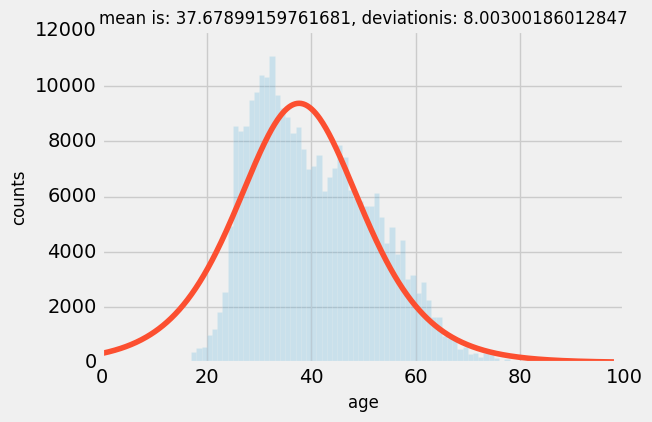

In [281]:
(n,bins,patches) = pl.hist(df.age,bins,alpha = 0.2)
x_lin = np.linspace(bins[0], bins[-1], np.size(n))
x_space = np.linspace(0, bins[-1], 500)
popt, pcov = curve_fit(logistic, x_lin, n, p0 = [20, 12, 5])
y = logistic(x_space, *popt)
pl.xlabel('age', fontsize = 12)
pl.ylabel('counts', fontsize = 12)
pl.plot(x_space, y, label= 'fit')
pl.title("mean is: {}, deviationis: {}".format(popt[0],popt[1]),fontsize=12)

#### KS test
Null Hypothesis:
$H_0$: age distribution is similar to logistic with fix mean and standard deviation

#### AD test
Null Hypothesis:
$H_0$: age distribution is similar to logistic distribution

In [283]:
stats.kstest(a, "logistic", args=(popt[0],popt[1]))

KstestResult(statistic=0.98988084285911859, pvalue=0.0)

p-value is aprroach to zero which means age distribution is not from this gaussian distribution

In [286]:
stats.anderson(a,'logistic')

AndersonResult(statistic=inf, critical_values=array([ 0.426,  0.563,  0.66 ,  0.769,  0.906,  1.01 ]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))

 AD test return is too big for null hypothesis, thus the age distribution is not drawn from gaussian